In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [3]:
train_df.info() # looking at null entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_df.info() #looking at null entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
women = train_df.loc[train_df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived: ",rate_women)

% of women who survived:  0.7420382165605095


In [6]:
men = train_df.loc[train_df.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)

print('% of men who survived: ',rate_men)

% of men who survived:  0.18890814558058924


In [7]:
# from sklearn.ensemble import RandomForestClassifier

# y = train_df["Survived"]

# features = ["Pclass", "Sex", "SibSp", "Parch"]
# X = pd.get_dummies(train_df[features])
# X_test = pd.get_dummies(test_df[features])

# model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
# model.fit(X, y)
# predictions = model.predict(X_test)

# output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")


Data Exploration
I started the data exploration process by trying to answer the following questions to become more familiar with the data types and quantity of data.

1. Which features are listed in the dataset?
2. Which features are categorical or numerical?
3. Which features include mixed data types?
4. Which features may contain errors, typos or missing data?
5. Which features could contribute to a high survival rate

1. **Which features are listed in the dataset?** 

    The features are: PassengerID, Survived, Pclass (Passanger Class = 1st, 2nd, 3rd), Name, Sex, Age, SibSP (Number of Siblings/Spouses Aboard), Parch (Number of Parents/Children Aboard), Ticket, Fare (Passenger Fare (British pound)), Cabin, Embarked(Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton))
    
    Separar os passageiros por idades especificas para ver se tem alguma diferença gritante de percentual

In [8]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


2. **Which features are categorical or numerical??**
    
    Categorical Data: Survived, Sex, Age, Embarked
    
    Ordinal Data : Pclass (Passanger Class)
    
    Discrete Data: SibSp, Parch,
    
    

In [10]:
train_df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [11]:
test = train_df.copy()

In [12]:
test = test[test['Age'].notna()]
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Test Survival Rate of people in their 20's

In [13]:
x = test.loc[(test.Age >=20) & (test.Age<=30)] #People in their 20's 
x_surv = x['Survived']

x_rate = sum(x_surv)/len(x_surv) #Percentage
x_rate

0.3551020408163265

In [14]:
y = test.loc[test.Age > 30]['Survived']
y_rate = sum(y)/len(y)
y_rate

0.4065573770491803

In [15]:
z = test.loc[test.Age < 20]['Survived']
z_rate = sum(z)/len(z)
z_rate

0.4817073170731707

In [16]:
xxx = test.loc[(test.Age >=20) & (test.Age<=30) & (test.Sex == 'female')]['Survived']
xxx_rate = sum(xxx)/len(xxx)
xxx_rate

0.7349397590361446

In [17]:
xxy = test.loc[(test.Age >=20) & (test.Age<=30) & (test.Sex == 'male')]['Survived']
xxy_rate = sum(xxy)/len(xxy)
xxy_rate

0.16049382716049382

In [18]:
yxx = test.loc[(test.Age > 30) & (test.Sex == 'female')]['Survived']
yxx_rate = sum(yxx)/len(yxx)
yxx_rate

0.8058252427184466

In [19]:
yxy = test.loc[(test.Age > 30) & (test.Sex == 'male')]['Survived']
yxy_rate = sum(yxy)/len(yxy)
yxy_rate

0.20297029702970298

In [20]:
zxx = test.loc[(test.Age < 20) & (test.Sex == 'female')]['Survived']
zxx_rate = sum(zxx)/len(zxx)
zxx_rate

0.7066666666666667

In [21]:
zxy = test.loc[(test.Age < 20) & (test.Sex == 'male')]['Survived']
zxy_rate = sum(zxy)/len(zxy)
zxy_rate

0.29213483146067415

In [22]:
class1_intern_rate = train_df.loc[train_df.Pclass == 1]['Survived'].sum() / len(train_df.loc[train_df.Pclass == 1])
class1_intern_rate

0.6296296296296297

In [23]:
class2_intern_rate = train_df.loc[train_df.Pclass == 2]['Survived'].sum() / len(train_df.loc[train_df.Pclass == 2])
class2_intern_rate

0.47282608695652173

In [24]:
class3_intern_rate = train_df.loc[train_df.Pclass == 3]['Survived'].sum() / len(train_df.loc[train_df.Pclass == 3])
class3_intern_rate

0.24236252545824846

In [25]:
class1_rate = train_df.loc[train_df.Pclass == 1]['Survived'].sum() / len(train_df)
class1_rate

0.1526374859708193

In [26]:
class2_rate = train_df.loc[train_df.Pclass == 2]['Survived'].sum() / len(train_df)
class2_rate

0.09764309764309764

In [27]:
class3_rate = train_df.loc[train_df.Pclass == 3]['Survived'].sum() / len(train_df)
class3_rate

0.1335578002244669

In [28]:
train_df[['Pclass','Survived']].value_counts(normalize=True)

Pclass  Survived
3       0           0.417508
1       1           0.152637
3       1           0.133558
2       0           0.108866
        1           0.097643
1       0           0.089787
dtype: float64

In [29]:
train_df[['Embarked', 'Survived']].value_counts(normalize=True)

Embarked  Survived
S         0           0.480315
          1           0.244094
C         1           0.104612
          0           0.084364
Q         0           0.052868
          1           0.033746
dtype: float64

<AxesSubplot:xlabel='Age', ylabel='N of People'>

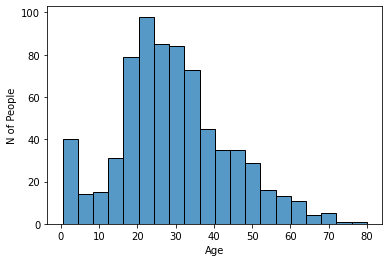

In [30]:
ax = sns.histplot(test.Age)
ax.set_ylabel('N of People')
ax

In [31]:
test_df = pd.read_csv('test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [32]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [34]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

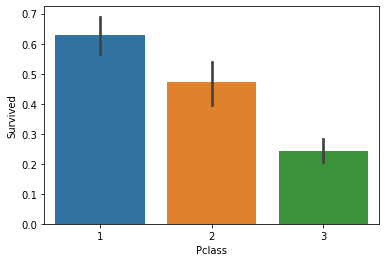

In [35]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

In [36]:
train_df[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

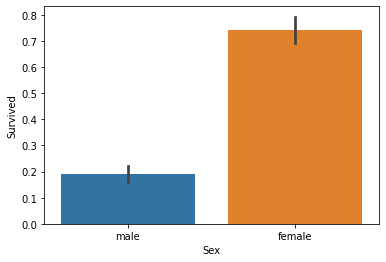

In [37]:
sns.barplot(x='Sex', y='Survived', data=train_df)

In [38]:
sex_rename = {'male' : 0,
              'female' : 1
             }

In [39]:
train_df['Sex'] = train_df.Sex.map(sex_rename)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [40]:
test_df['Sex'] = test_df.Sex.map(sex_rename)

In [41]:
test = train_df.copy()

In [42]:
test = test[test['Age'].notna()]

In [43]:
test.loc[test['Embarked'].isna()] #Seeing the people that had no registry on Embarked, both survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


C:\Users\pedro\anaconda3\envs\alura_pandas\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


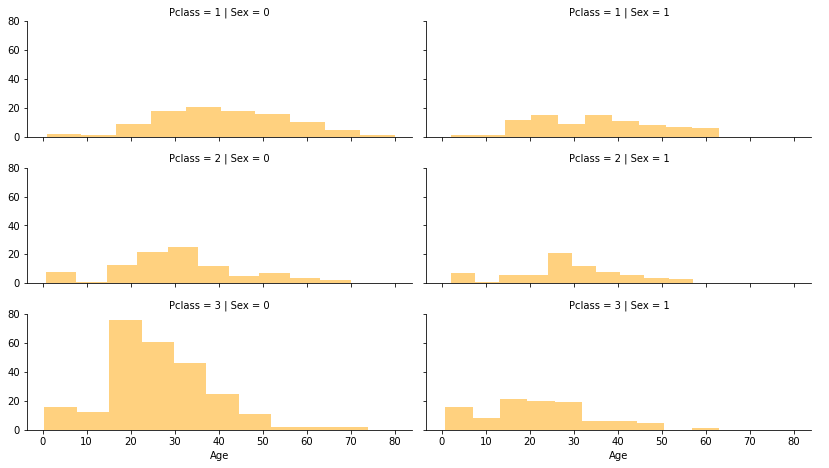

In [44]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=2.6)
grid.map(plt.hist, 'Age', alpha = .5, bins=10, color='orange')
plt.ylim((0,80))
grid.add_legend()

In [45]:
test['Embarked'] = test.Embarked.fillna('S')

In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     714 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 72.5+ KB


In [47]:
test[['Survived', 'Embarked']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.607692
S,0.365108
Q,0.285714


In [48]:
test.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         0
dtype: int64

In [49]:
rename_embark = {'S' : 0,
                 'C' : 1,
                 'Q' : 2
                }

In [50]:
test['Embarked'] = test.Embarked.map(rename_embark)
test_df['Embarked'] = test_df.Embarked.map(rename_embark)

In [51]:
test.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",1,39.0,0,5,382652,29.125,NaN,2
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.000,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.000,B42,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.000,C148,1
890,891,0,3,"Dooley, Mr. Patrick",0,32.0,0,0,370376,7.750,NaN,2


In [52]:
test.Parch = test.Parch.astype(int)

In [53]:
test.SibSp = test.SibSp.astype(int)

In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int32  
 7   Parch        714 non-null    int32  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     714 non-null    int64  
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 66.9+ KB


In [55]:
test = test.drop(['PassengerId'], axis=1)
test

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Rice, Mrs. William (Margaret Norton)",1,39.0,0,5,382652,29.1250,NaN,2
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1


In [56]:
test = test.drop(['Ticket', 'Cabin'], axis=1)
test

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
885,0,3,"Rice, Mrs. William (Margaret Norton)",1,39.0,0,5,29.1250,2
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,0
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,0
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,1


In [57]:
test.shape

(714, 9)

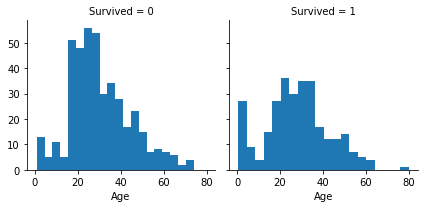

In [58]:
age_hist = sns.FacetGrid(test, col='Survived')
age_hist.map(plt.hist, 'Age', bins=20)

In [59]:
test_df = test_df.drop(['Cabin','Ticket', 'Cabin', 'Name'], axis = 1)
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,1305,3,0,NaN,0,0,8.0500,0
414,1306,1,1,39.0,0,0,108.9000,1
415,1307,3,0,38.5,0,0,7.2500,0
416,1308,3,0,NaN,0,0,8.0500,0


In [60]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,1305,3,0,NaN,0,0,8.0500,0
414,1306,1,1,39.0,0,0,108.9000,1
415,1307,3,0,38.5,0,0,7.2500,0
416,1308,3,0,NaN,0,0,8.0500,0


In [61]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [62]:
test_df = test_df[test_df['Age'].notna()]

In [63]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 415
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  332 non-null    int64  
 1   Pclass       332 non-null    int64  
 2   Sex          332 non-null    int64  
 3   Age          332 non-null    float64
 4   SibSp        332 non-null    int64  
 5   Parch        332 non-null    int64  
 6   Fare         331 non-null    float64
 7   Embarked     332 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 23.3 KB


In [64]:
test = test.drop(['Name'], axis=1)

In [65]:
test_df.Fare = test_df.Fare.fillna(7)

C:\Users\pedro\AppData\Local\Temp\ipykernel_14264\504621040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.Fare = test_df.Fare.fillna(7)


In [66]:
X_test = test.drop("Survived", axis=1)
Y_test = test["Survived"]
X_test2  = test_df.drop("PassengerId", axis=1).copy()

In [67]:
# Logistic Regression Score
logreg = LogisticRegression()
logreg.fit(X_test, Y_test)
Y_pred = logreg.predict(X_test2)
acc_log = round(logreg.score(X_test, Y_test) * 100, 2)
acc_log

80.53

In [68]:
# Decision Tree Score
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_test, Y_test)
Y_pred = decision_tree.predict(X_test2)
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
acc_decision_tree

98.6